# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
Link Dataset : https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer

  Dataset yang digunakan adalah "Survey Lung Cancer" yang berisi data survei pasien untuk memprediksi kemungkinan kanker paru-paru berdasarkan berbagai atribut.

**Atribut pada Dataset:**
* **GENDER:** Jenis kelamin pasien (M/F)
* **AGE:** Usia pasien
* **SMOKING:** Apakah pasien merokok (2=Ya, 1=Tidak)
* **YELLOW_FINGERS:** Apakah pasien memiliki jari kuning (2=Ya, 1=Tidak)
* **ANXIETY:** Apakah pasien memiliki kecemasan (2=Ya, 1=Tidak)
* **PEER_PRESSURE:** Apakah pasien mengalami tekanan dari rekan sebaya (2=Ya, 1=Tidak)
* **CHRONIC DISEASE:** Apakah pasien memiliki penyakit kronis (2=Ya, 1=Tidak)
* **FATIGUE:** Apakah pasien sering merasa lelah (2=Ya, 1=Tidak)
* **ALLERGY:** Apakah pasien memiliki alergi (2=Ya, 1=Tidak)
* **WHEEZING:** Apakah pasien mengalami mengi (2=Ya, 1=Tidak)
* **ALCOHOL CONSUMING:** Apakah pasien mengonsumsi alkohol (2=Ya, 1=Tidak)
* **COUGHING:** Apakah pasien sering batuk (2=Ya, 1=Tidak)
* **SHORTNESS OF BREATH:** Apakah pasien mengalami sesak napas (2=Ya, 1=Tidak)
* **SWALLOWING DIFFICULTY:** Apakah pasien mengalami kesulitan menelan (2=Ya, 1=Tidak)
* **CHEST PAIN:** Apakah pasien mengalami nyeri dada (2=Ya, 1=Tidak)
* **LUNG_CANCER:** **(Target)** Apakah pasien didiagnosis kanker paru-paru (YES/NO)

Tujuan dari proyek ini adalah membangun sistem machine learning yang dapat memprediksi `LUNG_CANCER` berdasarkan fitur-fitur yang ada.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [13]:
file_path = '/content/survey_lung_cancer_raw.csv'

try:
    df = pd.read_csv(file_path)
    print(f"Data dari '{file_path}' berhasil dimuat.")
    print("\nLima baris pertama dari dataset:")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File '{file_path}' tidak ditemukan. Mohon unggah file tersebut.")

Data dari '/content/survey_lung_cancer_raw.csv' berhasil dimuat.

Lima baris pertama dari dataset:


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [14]:
print("--- Informasi Dasar Dataset ---")
df.info()

--- Informasi Dasar Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int

In [15]:
print("\n--- Deskripsi Statistik ---")
display(df.describe())


--- Deskripsi Statistik ---


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [16]:
print("\n--- Jumlah Data Kosong per Kolom ---")
print(df.isnull().sum())


--- Jumlah Data Kosong per Kolom ---
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [17]:
print("\n--- Pengecekan Data Duplikat ---")
print(f"Jumlah Data Duplikat ditemukan: {df.duplicated().sum()}")


--- Pengecekan Data Duplikat ---
Jumlah Data Duplikat ditemukan: 33


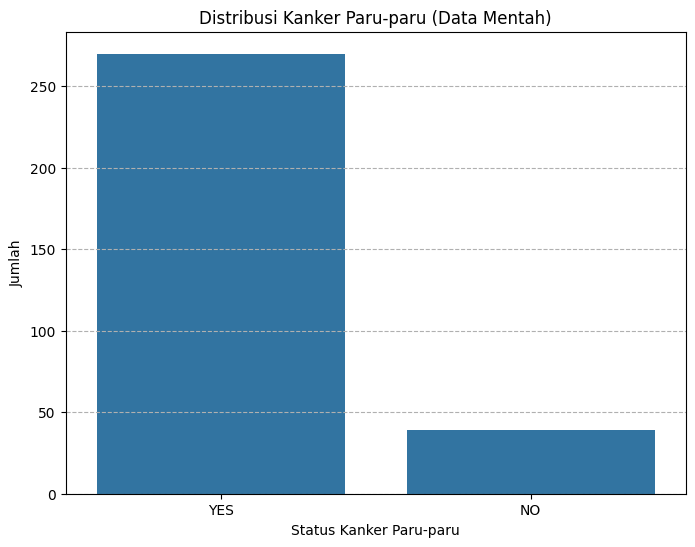

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='LUNG_CANCER', data=df)
plt.title('Distribusi Kanker Paru-paru (Data Mentah)')
plt.xlabel('Status Kanker Paru-paru')
plt.ylabel('Jumlah')
plt.grid(axis='y', linestyle='--')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
print(f"Bentuk data sebelum menghapus duplikat: {df.shape}")
df_cleaned = df.drop_duplicates()
print(f"Bentuk data setelah menghapus duplikat: {df_cleaned.shape}")
print("-" * 50)

Bentuk data sebelum menghapus duplikat: (309, 16)
Bentuk data setelah menghapus duplikat: (276, 16)
--------------------------------------------------


In [20]:
print("Melakukan encoding data kategorikal...")

# Encoding 'GENDER' (M -> 1, F -> 0)
le = LabelEncoder()
df_cleaned['GENDER'] = le.fit_transform(df_cleaned['GENDER'])

# Encoding 'LUNG_CANCER' (YES -> 1, NO -> 0)
df_cleaned['LUNG_CANCER'] = df_cleaned['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Encoding kolom fitur lainnya (2 -> 1, 1 -> 0)
columns_to_map = [col for col in df_cleaned.columns if col not in ['GENDER', 'AGE', 'LUNG_CANCER']]
for column in columns_to_map:
    df_cleaned[column] = df_cleaned[column].map({2: 1, 1: 0})

print("Proses encoding selesai.")
print("\nLima baris pertama dari data setelah preprocessing:")
display(df_cleaned.head())
print("-" * 50)

Melakukan encoding data kategorikal...
Proses encoding selesai.

Lima baris pertama dari data setelah preprocessing:


<ipython-input-20-1093827635>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GENDER'] = le.fit_transform(df_cleaned['GENDER'])
<ipython-input-20-1093827635>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LUNG_CANCER'] = df_cleaned['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
<ipython-input-20-1093827635>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


--------------------------------------------------


In [21]:
output_filename = 'survey_lung_cancer_preprocessing.csv'
df_cleaned.to_csv(output_filename, index=False)
print(f"Dataset yang sudah bersih dan diproses telah disimpan sebagai: '{output_filename}'")

Dataset yang sudah bersih dan diproses telah disimpan sebagai: 'survey_lung_cancer_preprocessing.csv'
